In [1]:
# Barron functions:
## Linear functions f(x) = a^Tx + b
## Radial Basis Functions (RBF) f(x) = exp(-gamma * ||x - c||^2)
## Trigonomial functions f(x) = cos(ax) and sin(ax)

In [3]:
import numpy as np
import ot

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

%load_ext autoreload
%autoreload 2

In [4]:
from src.function_distrib import FunctionDistrib

n = 100
d = 3
l = 3

linear_functions = FunctionDistrib(n, d, l, function_type="linear", prior="uniform_cube")

linear_functions.Z.shape, linear_functions.Y.shape

[[ 1.88104074e+00 -1.45879857e+00 -1.72659090e-01]
 [ 1.99114629e+00 -1.67866043e-01  1.13779617e+00]
 [ 1.88243092e+00 -1.28252816e+00  9.95402284e-02]
 [ 2.34174675e+00 -1.00183019e+00 -1.25241285e-01]
 [ 1.96665178e+00 -2.10952826e-01  1.05484873e+00]
 [ 2.08333177e+00 -7.59428360e-01  4.90275750e-01]
 [ 2.10962186e+00 -8.20428546e-01  3.40703033e-01]
 [ 2.03216690e+00 -5.71289168e-01  7.56123812e-01]
 [ 1.75095468e+00 -7.05102115e-01  7.68402416e-01]
 [ 1.77252942e+00 -3.75761206e-01  1.10800044e+00]
 [ 1.95128796e+00 -7.15999139e-02  1.27800675e+00]
 [ 1.87714847e+00 -1.48777727e+00 -3.37307508e-01]
 [ 2.22270780e+00 -7.76360851e-01  3.24779167e-01]
 [ 2.13702044e+00 -5.57422074e-01  6.12307048e-01]
 [ 1.73973593e+00 -9.18699875e-01  6.36222120e-01]
 [ 2.05702810e+00 -7.00165484e-01  4.66549618e-01]
 [ 2.28028631e+00 -1.14381234e+00 -1.95447908e-01]
 [ 1.92758852e+00 -1.59055030e+00 -4.54983198e-01]
 [ 1.64670077e+00 -6.59805408e-01  8.74258198e-01]
 [ 2.11763308e+00 -3.32544631e-

((100, 3), (100, 3))

In [119]:
from src.trainer import Trainer

config = {
    "function_distrib":{
        "n": 1000,
        "d": 2,
        "l": 6,
        "output_size": 2,
        "function_type": "random",
        "output_function": "linear",
        "prior": "uniform_ball", # uniform_cube, uniform_ball, gaussian, gaussian_mixture
        "seed": 1,
    },

    "model": {
        # "input_size": # infer
        # "output_size": # infer
        "hidden_size": 40,
        "n_hidden_layers": 2
    },

    "optimizer": {
        "lr": 0.001,
    },

    "epochs": 300,
}

trainer = Trainer(config, is_debug=True)
losses, w2_distances = trainer.train()

function_type: rbf
input_size: 2
output_size: None
function_type: rbf
input_size: 1
output_size: None
function_type: rbf
input_size: 1
output_size: None
function_type: rbf
input_size: 1
output_size: None
function_type: rbf
input_size: 1
output_size: None
function_type: linear
input_size: 1
output_size: 2


array([<Axes3D: title={'center': 'Input distribution'}>,
       <Axes: title={'center': 'Original Output distribution'}>,
       <Axes: title={'center': 'NN Output distribution'}>], dtype=object)

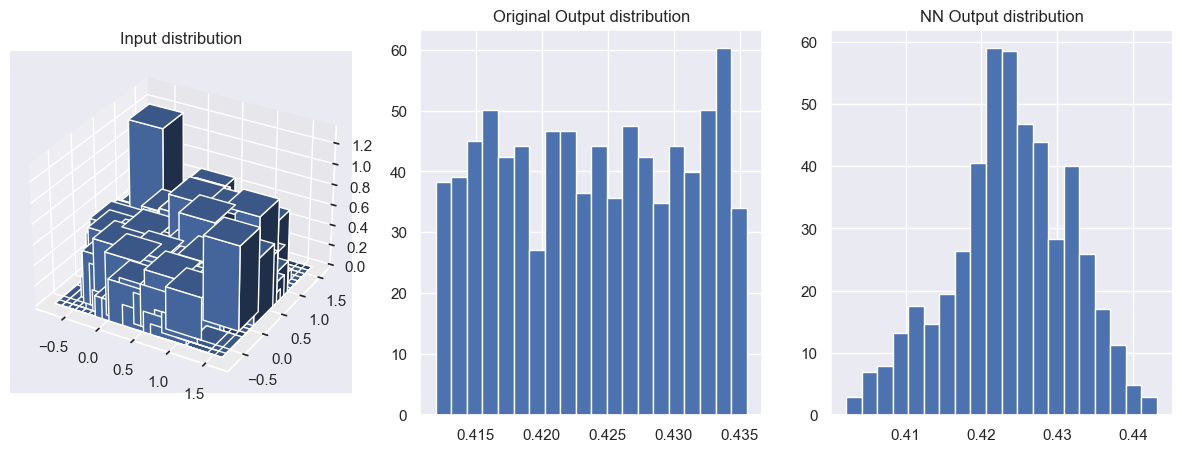

In [115]:
trainer.plot_input_output()

Uniform cube
Uniform ball
Gaussian
Gaussian mixture


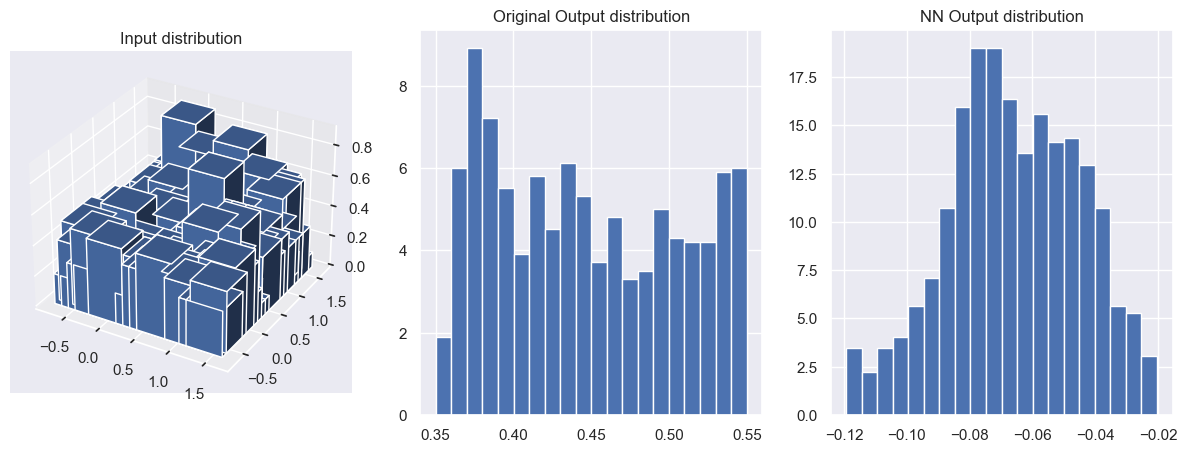

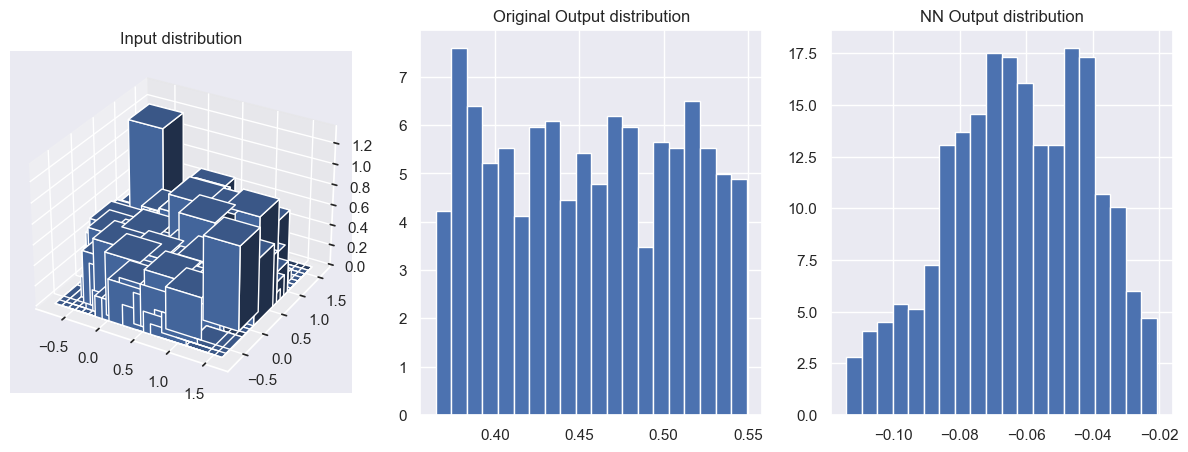

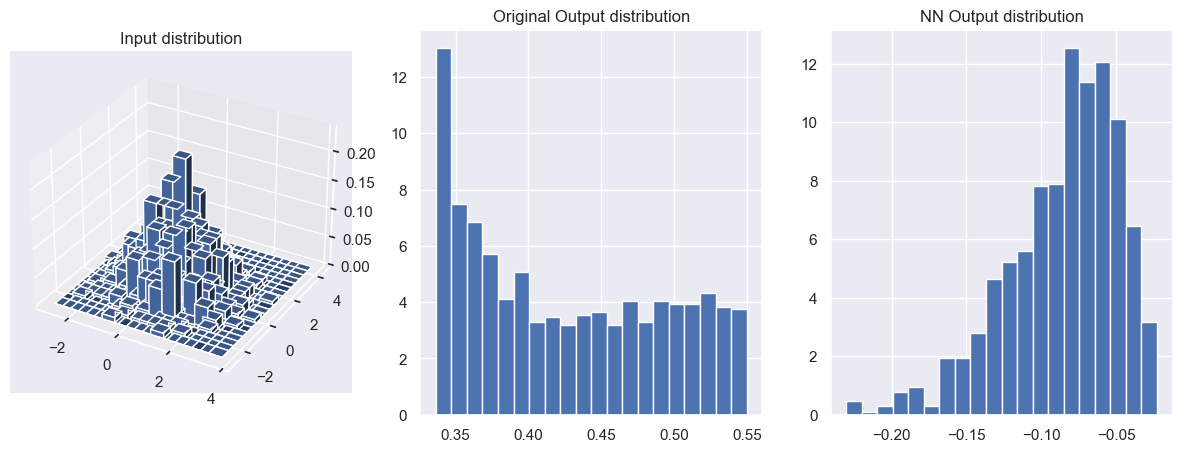

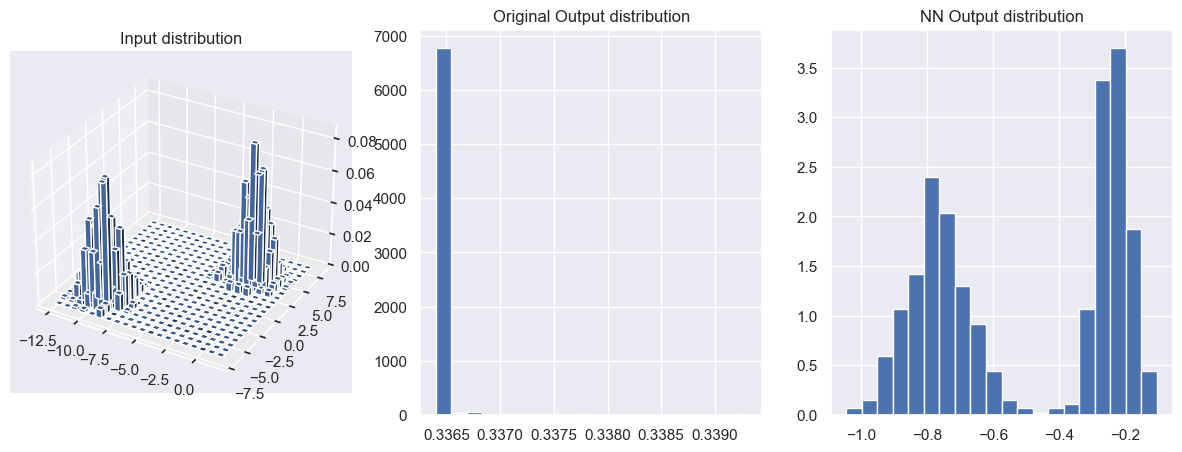

In [101]:
priors = ["uniform_cube", "uniform_ball", "gaussian", "gaussian_mixture"]
titles = ["Uniform cube", "Uniform ball", "Gaussian", "Gaussian mixture"]

for i, prior in enumerate(priors):
    config_prior = config.copy()
    config_prior["function_distrib"]["prior"] = prior
    print(titles[i])
    trainer = Trainer(config_prior)
    trainer.plot_input_output()

In [13]:
trainer.function_distrib.Y

array([[  -3.74639282, -103.36745138],
       [  79.23806291,  -24.51942465],
       [ -37.31386738,  -62.96603106],
       ...,
       [ -11.91421952,  -91.48525354],
       [ -10.99539253,  -84.52158328],
       [  93.30140941,  -23.04512297]])

In [14]:
hidden_sizes = [5, 10, 20, 50, 100, 200, 500]
ls = [1, 2, 3, 10, 15]
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

losses = np.zeros((len(seeds), len(hidden_sizes), len(ls)))
w2_distances = np.zeros((len(seeds), len(hidden_sizes), len(ls)))

for s in seeds:
    for i, hidden_size in enumerate(hidden_sizes):
        for j, l in enumerate(ls):
            config["function_distrib"]["seed"] = s
            config["model"]["hidden_size"] = hidden_size
            config["function_distrib"]["l"] = l
            trainer = Trainer(config)
            loss, w2 = trainer.train(plot=False)
            losses[s, i, j] = loss[-1]
            w2_distances[s, i, j] = w2[-1]

(2, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(10

KeyboardInterrupt: 

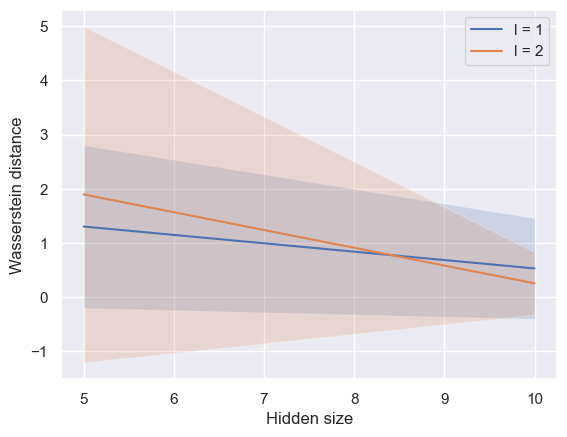

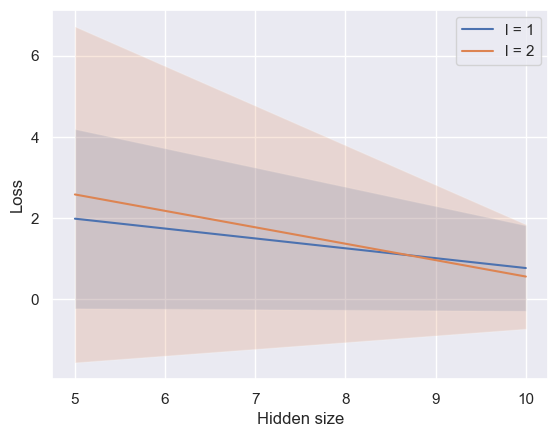

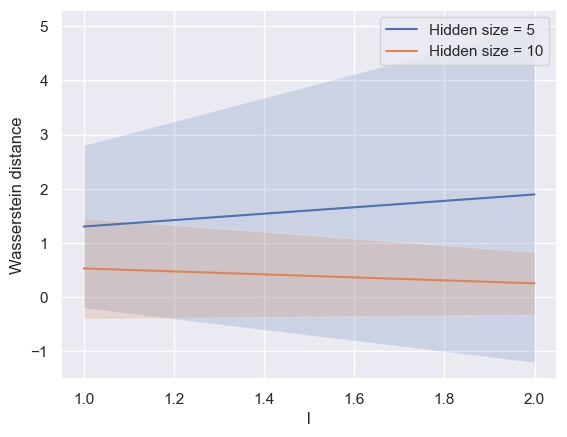

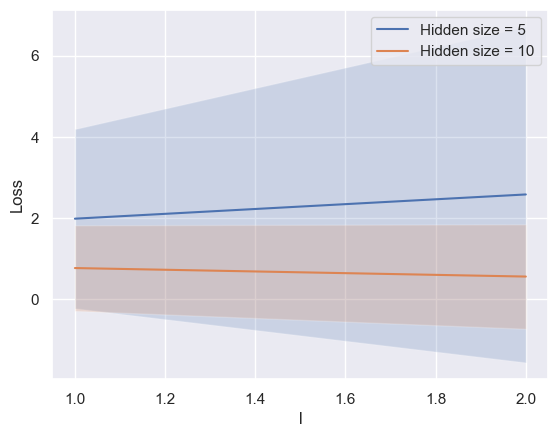

In [11]:
for i, l in enumerate(ls):
    mean = np.mean(w2_distances[:, :, i], axis=0)
    std_dev = np.std(w2_distances[:, :, i], axis=0)
    plt.plot(hidden_sizes, mean, label='l = {}'.format(l))
    plt.fill_between(hidden_sizes, mean - std_dev, mean + std_dev, alpha=0.2)
plt.ylabel('Wasserstein distance')
plt.xlabel('Hidden size')
plt.legend()
plt.show()

for i, l in enumerate(ls):
    mean = np.mean(losses[:, :, i], axis=0)
    std_dev = np.std(losses[:, :, i], axis=0)
    plt.plot(hidden_sizes, mean, label='l = {}'.format(l))
    plt.fill_between(hidden_sizes, mean - std_dev, mean + std_dev, alpha=0.2)
plt.ylabel('Loss')
plt.xlabel('Hidden size')
plt.legend()
plt.show()

for i, hidden_size in enumerate(hidden_sizes):
    mean = np.mean(w2_distances[:, i, :], axis=0)
    std_dev = np.std(w2_distances[:, i, :], axis=0)
    plt.plot(ls, mean, label='Hidden size = {}'.format(hidden_size))
    plt.fill_between(ls, mean - std_dev, mean + std_dev, alpha=0.2)
plt.ylabel('Wasserstein distance')
plt.xlabel('l')
plt.legend()
plt.show()

for i, hidden_size in enumerate(hidden_sizes):
    mean = np.mean(losses[:, i, :], axis=0)
    std_dev = np.std(losses[:, i, :], axis=0)
    plt.plot(ls, mean, label='Hidden size = {}'.format(hidden_size))
    plt.fill_between(ls, mean - std_dev, mean + std_dev, alpha=0.2)
plt.ylabel('Loss')
plt.xlabel('l')
plt.legend()
plt.show()